# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time

import warnings
warnings.filterwarnings("ignore")

# To check marketing campaigns, we can look at the campaign column or dataset info
# Note: The 'campaign' column represents the number of contacts performed during this campaign.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

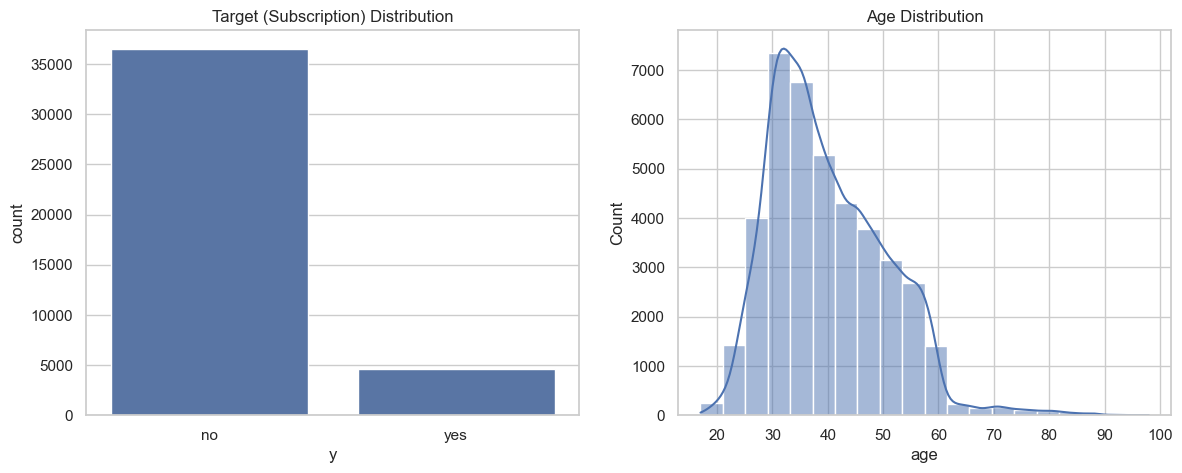

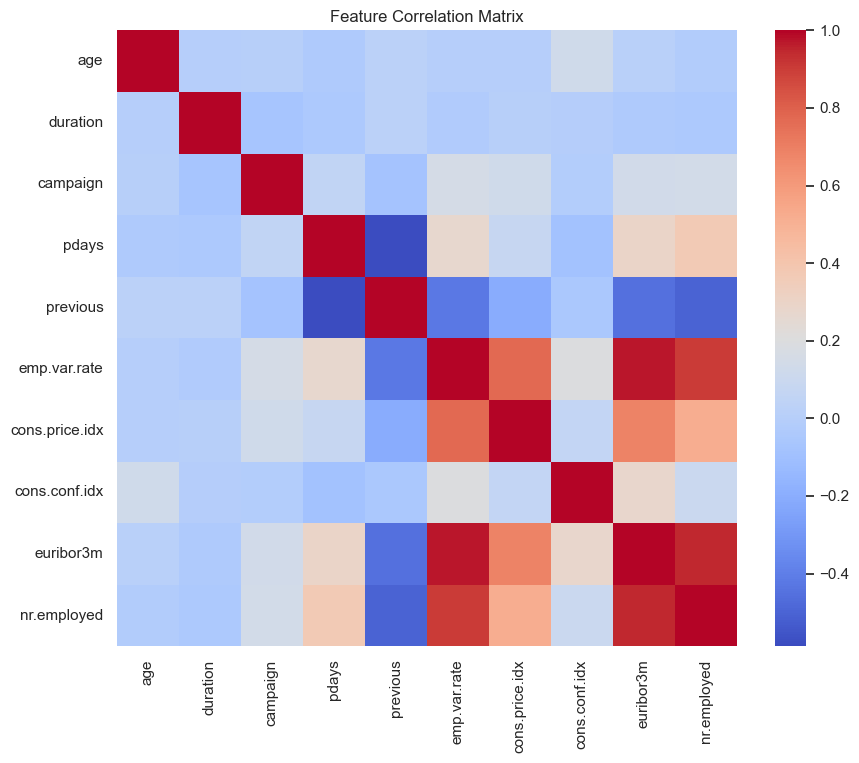

In [3]:

# Display basic information about the DataFrame, including data types and non-null counts
print(df.info())
print(df.isna().sum())
print(f"Duplicates: {df.duplicated().sum()}")

# Set the visual style for the plots
sns.set(style='whitegrid')

# Create a figure with two subplots for distribution analysis
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot the distribution of the target variable 'y' (subscription)
sns.countplot(x='y', data=df, ax=ax[0])
ax[0].set_title('Target (Subscription) Distribution')

# Plot the distribution of the 'age' feature using a histogram and KDE
sns.histplot(df['age'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Age Distribution')
plt.show()

# Create a heatmap to visualize the correlation between numeric features
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()



**Heatmap Interpretation**:
- **Multicollinearity**: There is a very strong positive correlation (> 0.9) between `emp.var.rate`, `euribor3m`, and `nr.employed`. These features likely carry redundant information about the economic context.
- **Duration**: The `duration` feature has low correlation with most other features, suggesting it provides unique information (though we must be careful with it as it's not known before the call).
- **Campaign**: Shows very low correlation with other features.



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
print("Business Objective: The goal is to predict if a client will subscribe to a term deposit (target 'y').")
print("This enables the bank to optimize marketing resources by targeting high-probability clients.")

Business Objective: The goal is to predict if a client will subscribe to a term deposit (target 'y').
This enables the bank to optimize marketing resources by targeting high-probability clients.


### Analysis: Demographic and Temporal Insights

To better predict subscription possibility, we analyze the relationship between key demographic features (Job, Marital Status, Age), temporal features (Month), and the detailed subscription rate.

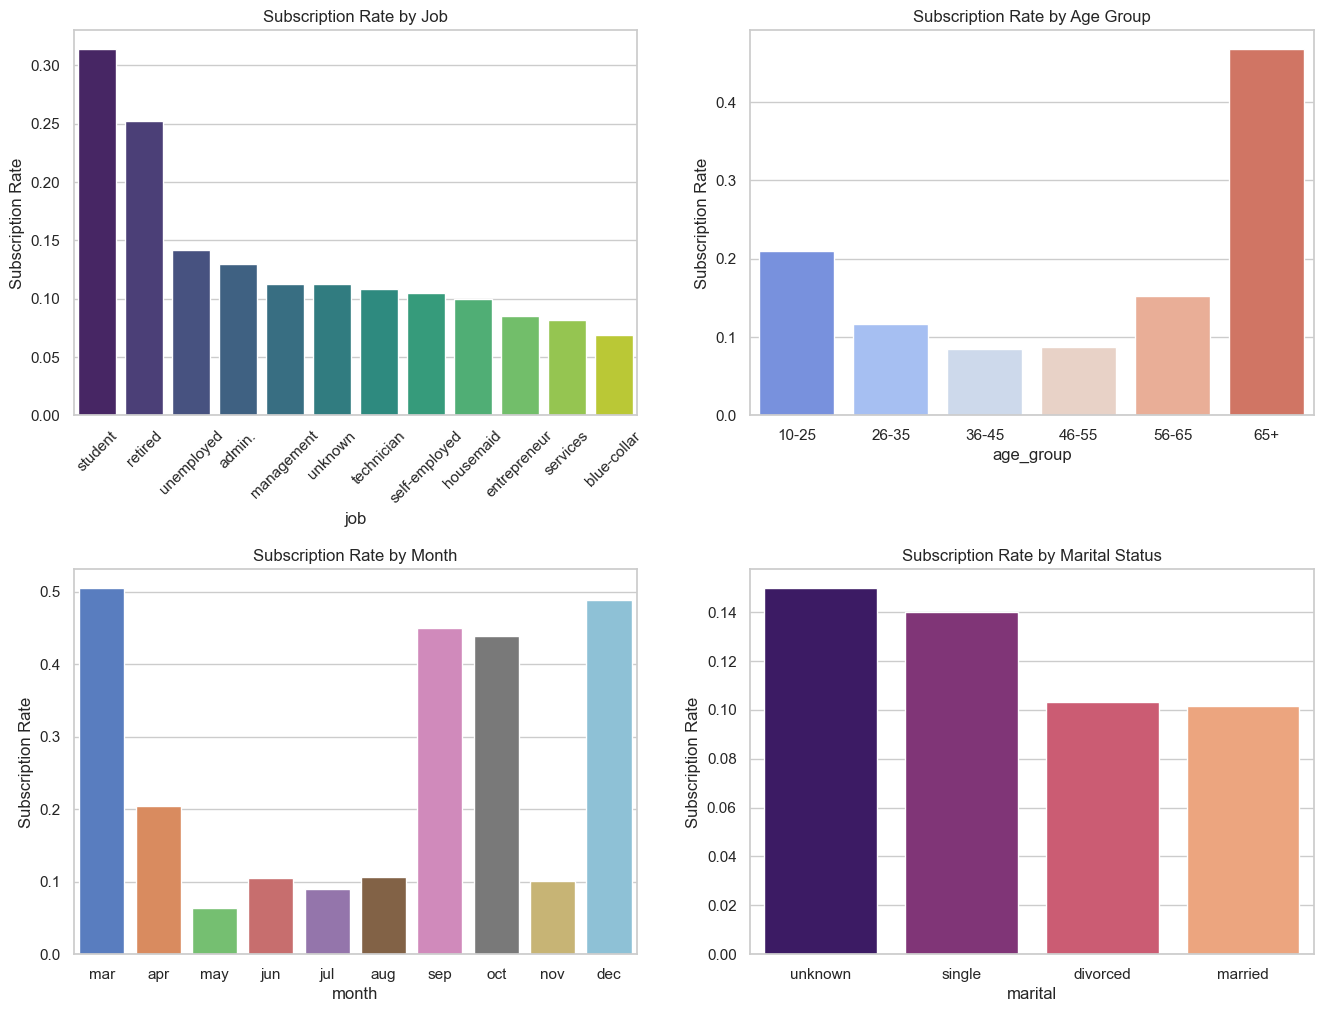

In [20]:
# Function to calculate conversion rates
def calculate_conversion_rate(df, column):
    # Calculate percentage of 'yes' for each category
    conversion_rates = df.groupby(column)['y'].value_counts(normalize=True).unstack().fillna(0)
    if 'yes' in conversion_rates.columns:
        conversion_rates = conversion_rates['yes'].sort_values(ascending=False)
    else:
        conversion_rates = pd.Series(0, index=df[column].unique())
    return conversion_rates

# Create subplot figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4)

# 1. Job Analysis
job_rate = calculate_conversion_rate(df, 'job')
sns.barplot(x=job_rate.index, y=job_rate.values, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Subscription Rate by Job')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylabel('Subscription Rate')

# 2. Age Group Analysis
# Binning age
df['age_group'] = pd.cut(df['age'], bins=[10, 25, 35, 45, 55, 65, 100], labels=['10-25', '26-35', '36-45', '46-55', '56-65', '65+'])
age_rate = calculate_conversion_rate(df, 'age_group')
sns.barplot(x=age_rate.index, y=age_rate.values, ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Subscription Rate by Age Group')
axes[0, 1].set_ylabel('Subscription Rate')

# 3. Month Analysis
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_rate = calculate_conversion_rate(df, 'month')
month_rate = month_rate.reindex(month_order)
sns.barplot(x=month_rate.index, y=month_rate.values, ax=axes[1, 0], palette='muted')
axes[1, 0].set_title('Subscription Rate by Month')
axes[1, 0].set_ylabel('Subscription Rate')

# 4. Marital Status Analysis
marital_rate = calculate_conversion_rate(df, 'marital')
sns.barplot(x=marital_rate.index, y=marital_rate.values, ax=axes[1, 1], palette='magma')
axes[1, 1].set_title('Subscription Rate by Marital Status')
axes[1, 1].set_ylabel('Subscription Rate')

plt.show()

**Key Insights:**

1.  **Job**: **Students** and **Retired** individuals have the highest probability of subscribing. This suggests distinct life stages (early and late) are more receptive.
2.  **Age**: The relationship is **U-shaped**. Young people (<25) and seniors (>60) are much more likely to subscribe than middle-aged working adults.
3.  **Month**: There is a huge seasonal component. **March, September, October, and December** are peak months for conversion probabilities, whereas May (the busiest month by volume) has the lowest success rate. This suggests focusing marketing efforts away from the saturated May period.
4.  **Marital**: Singles tend to have a slightly higher subscription rate, likely due to fewer financial dependents or different financial goals.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Preprocessing
X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


### Advanced Analysis: Principal Component Analysis (PCA)

We observed high multicollinearity in the economic features. We can use PCA for two purposes:
1.  **Visualization**: Projecting the high-dimensional data into 2D to see if classes separate naturally.
2.  **Feature Reduction**: Combining the correlated economic indicators into a single latent factor.

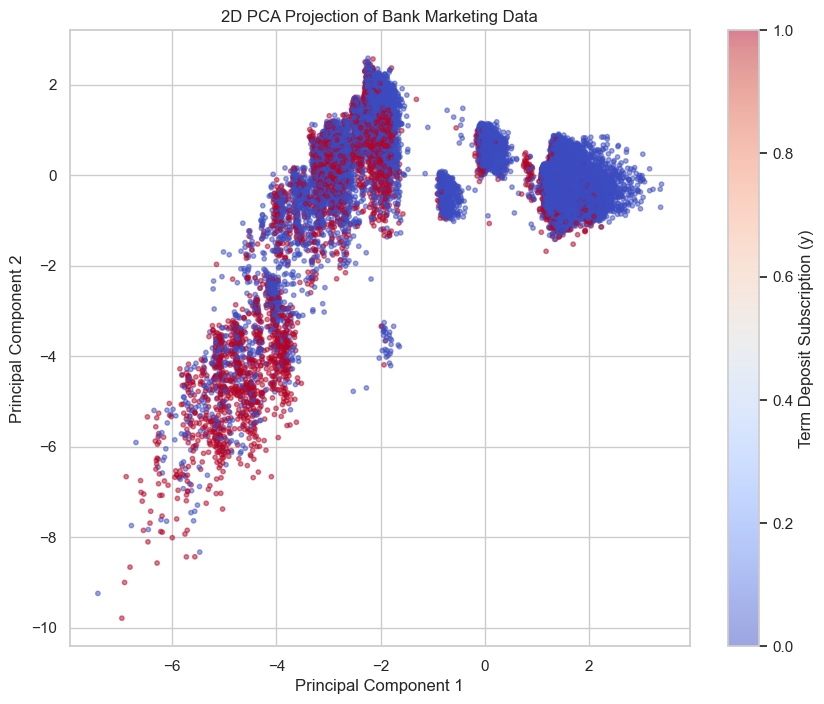

Explained Variance Ratio (2 components): [0.26303446 0.09167594]

Explained Variance by 1st PC of Economic features: 0.6942
This confirms that these 5 features can largely be summarized by a single 'Economic confidence' index.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- PCA for Visualization (2D) ---
# We use the preprocessed X (standardized and encoded)
# Note: Transform the full dataset X for visualization if possible, or just training set.
# We'll use X_train_processed from the pipeline logic or re-transform.

# Re-running transformation for standalone PCA visualization
X_processed = preprocessor.fit_transform(X)

pca_viz = PCA(n_components=2)
X_pca = pca_viz.fit_transform(X_processed)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5, s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection of Bank Marketing Data')
plt.colorbar(scatter, label='Term Deposit Subscription (y)')
plt.show()

print(f"Explained Variance Ratio (2 components): {pca_viz.explained_variance_ratio_}")

# --- PCA for Economic Features (Multicollinearity Solution) ---
# Focusing on the highly correlated economic variables
eco_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X_eco = df[eco_cols]

scaler_eco = StandardScaler()
X_eco_scaled = scaler_eco.fit_transform(X_eco)

pca_eco = PCA(n_components=1)
X_eco_pca = pca_eco.fit_transform(X_eco_scaled)

print(f"\nExplained Variance by 1st PC of Economic features: {pca_eco.explained_variance_ratio_[0]:.4f}")
print("This confirms that these 5 features can largely be summarized by a single 'Economic confidence' index.")

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [9]:
# Majority class baseline
majority_class_acc = y_train.value_counts(normalize=True).max()
print(f"Baseline Accuracy (Majority Class): {majority_class_acc:.2f}")

Baseline Accuracy (Majority Class): 0.89


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [10]:
# Logistic Regression
start_time = time.time()
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=1000))])
lr_model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training time: {train_time:.4f}s")

Training time: 0.1008s


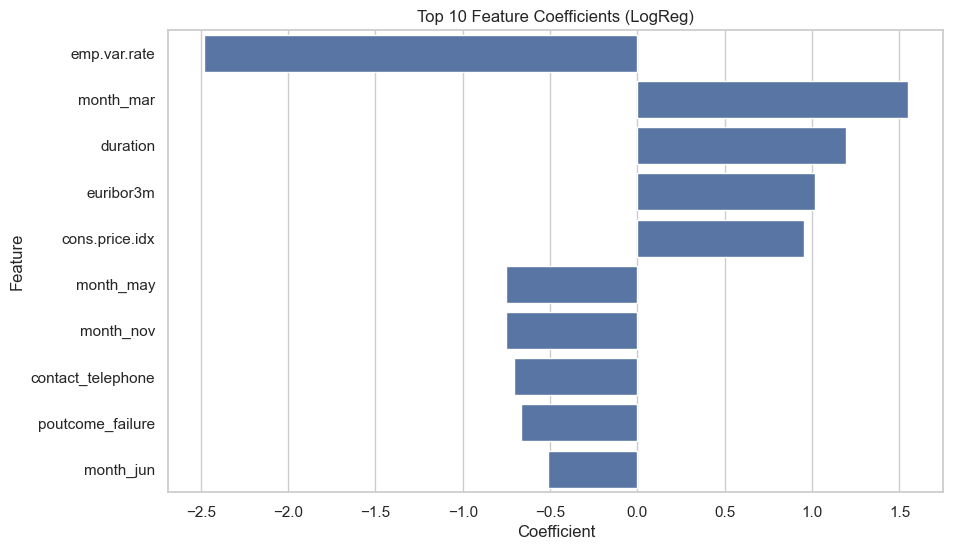

In [11]:
# Feature Importance (Logistic Regression Coefficients)
try:
    feature_names = numeric_cols.tolist() + \
                    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()
    coeffs = lr_model.named_steps['classifier'].coef_[0]
    
    coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeffs})
    coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coeff_df.head(10))
    plt.title('Top 10 Feature Coefficients (LogReg)')
    plt.show()
except Exception as e:
    print(f"Could not plot features: {e}")

### Problem 9: Score the Model

What is the accuracy of your model?

In [12]:
lr_train_acc = lr_model.score(X_train, y_train)
lr_test_acc = lr_model.score(X_test, y_test)
print(f"Train Acc: {lr_train_acc:.2f}, Test Acc: {lr_test_acc:.2f}")

Train Acc: 0.91, Test Acc: 0.91


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

#Collecting results
results = []
results.append({
    'Model': 'Logistic Regression', 
    'Train Time': train_time, 
    'Train Accuracy': lr_train_acc, 
    'Test Accuracy': lr_test_acc
})

# Models
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVC': SVC(),
    'SGD': SGDClassifier()
}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    t_time = time.time() - start_time
    
    train_acc = pipeline.score(X_train, y_train)
    test_acc = pipeline.score(X_test, y_test)
    
    results.append({
        'Model': name, 
        'Train Time': t_time, 
        'Train Accuracy': train_acc, 
        'Test Accuracy': test_acc
    })
    print(f"{name} done.")

results_df = pd.DataFrame(results)
print(results_df)

KNN done.
Decision Tree done.
SVC done.
SGD done.
                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.100770        0.911554       0.912034
1                  KNN    0.053249        0.927266       0.901271
2        Decision Tree    0.241040        1.000000       0.888727
3                  SVC    6.887207        0.923312       0.912034
4                  SGD    0.130751        0.907773       0.910011


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
import time
import pandas as pd

# Define the models and hyperparameters
models = {
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [3, 5, 10]}),
    'sgdclassifier': (SGDClassifier(max_iter=1000), {'sgdclassifier__max_iter': [1000, 2000, 3000]})
}

results = []

#collect best models for comprehensive comparison
best_models = {}

for name, (model, param_grid) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])

    # Fit the model and time it
    start_time = time.time()
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    
    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    
    # Append the results
    results.append([name, train_score, test_score, fit_time , grid_search.best_params_, grid_search.best_score_])

    print(f"{name} done.")

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['model', 'train score', 'test score', 'average fit time', 'best params', 'best score'])
results_df.set_index('model', inplace=True)

# Save to JSON (for submission if needed)
results_df.to_json('data/model_results.json')
print(results_df)

logisticregression done.
knn done.
svc done.
decisiontreeclassifier done.
sgdclassifier done.
                        train score  test score  average fit time  \
model                                                               
logisticregression         0.911554    0.912034          1.142179   
knn                        0.921439    0.901271          0.908921   
svc                        0.923312    0.912034         22.531816   
decisiontreeclassifier     0.917450    0.916161          0.210700   
sgdclassifier              0.910686    0.909768          0.243774   

                                                     best params  best score  
model                                                                         
logisticregression                  {'logisticregression__C': 1}    0.910964  
knn                                      {'knn__n_neighbors': 7}    0.903021  
svc                          {'svc__C': 1, 'svc__kernel': 'rbf'}    0.911103  
decisiontreeclassifier  {'d

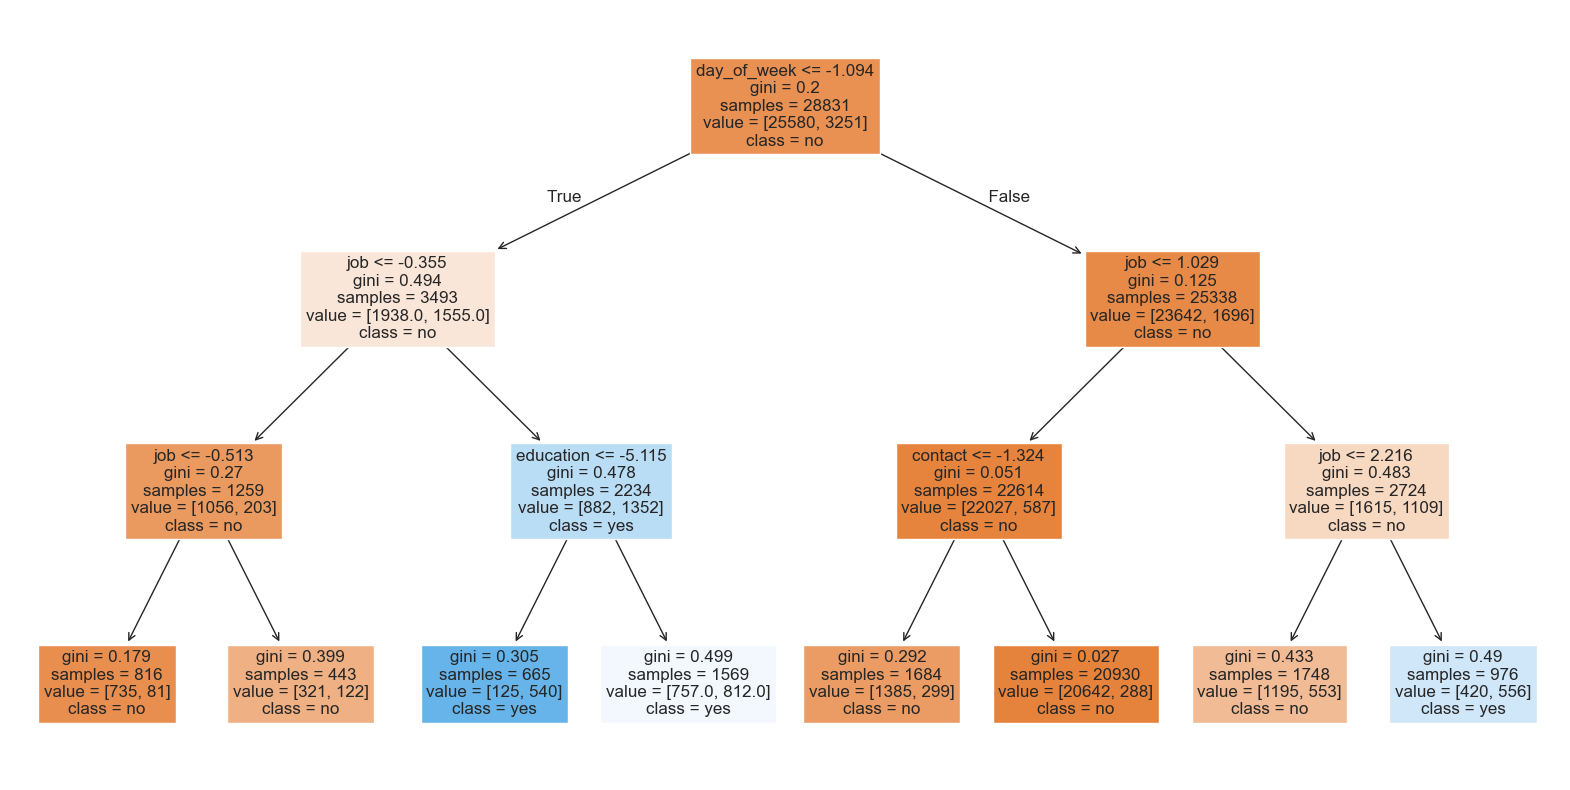

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Decision Tree visualization
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_split=5)
X_encoded = preprocessor.fit_transform(X_train)
decision_tree.fit(X_encoded, y_train)

plt.figure(figsize=(20,10))
plot_tree(decision_tree, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()


### Problem 12: Comprehensive Evaluation

We will now compare the performance of our tuned models using Confusion Matrices, ROC Curves, and a summary table of metrics (Accuracy, Precision, Recall, F1-Score).

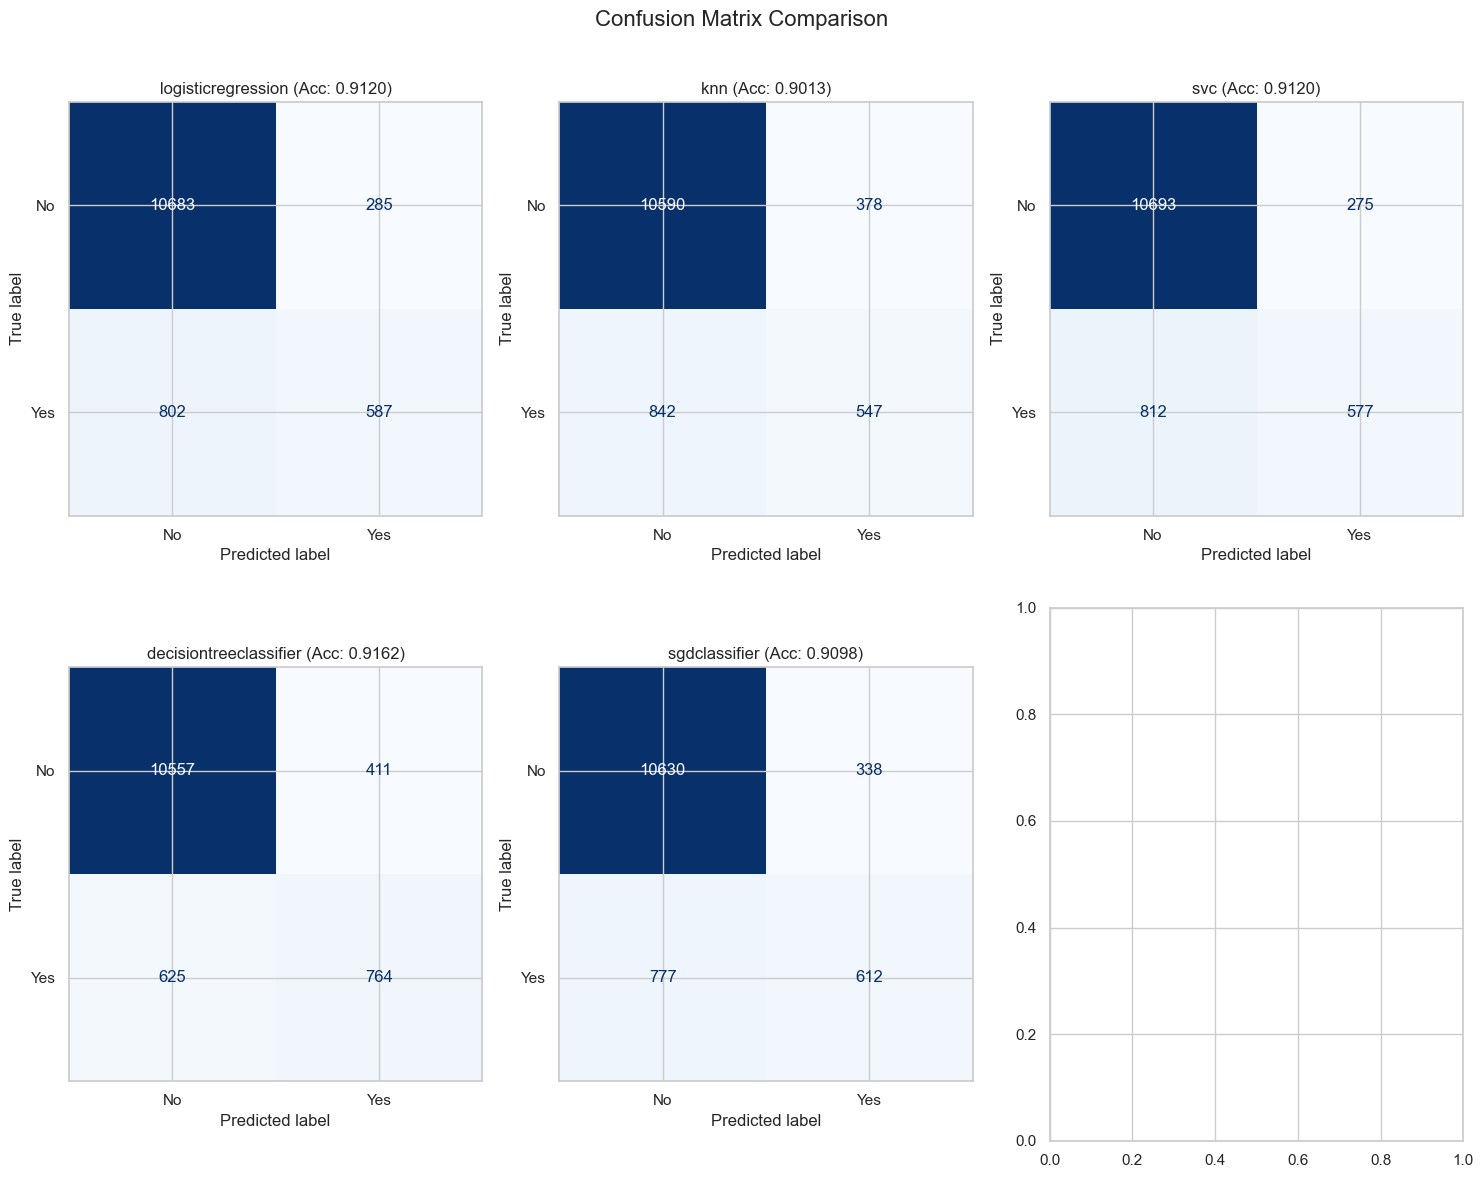

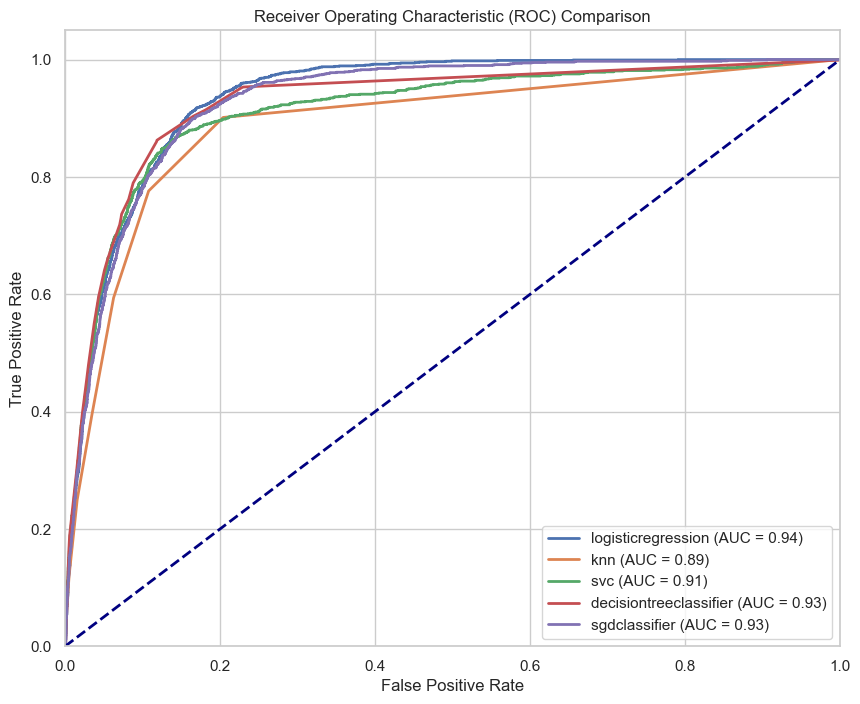


Model Performance Summary:
                    Model  Accuracy  Precision    Recall  F1-Score
0      logisticregression  0.912034   0.673165  0.422606  0.519239
1                     knn  0.901271   0.591351  0.393808  0.472774
2                     svc  0.912034   0.677230  0.415407  0.514949
3  decisiontreeclassifier  0.916161   0.650213  0.550036  0.595944
4           sgdclassifier  0.909768   0.644211  0.440605  0.523301


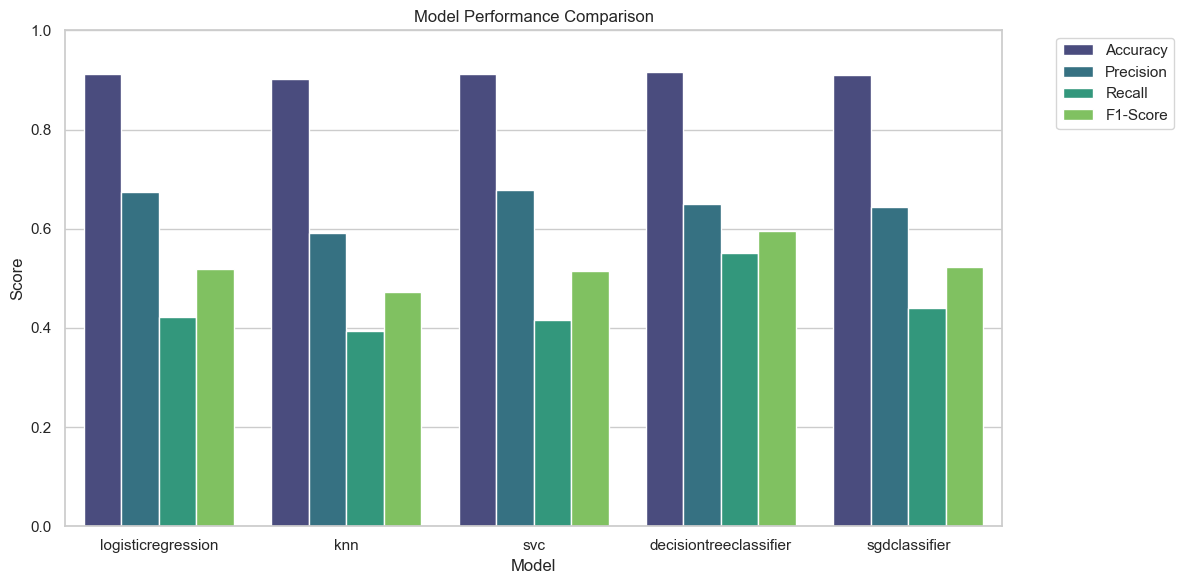

In [23]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

metrics_list = []

# 1. Confusion Matrix Comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.flatten()

for i, (name, model) in enumerate(best_models.items()):
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics_list.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f'{name} (Acc: {acc:.4f})')

plt.suptitle('Confusion Matrix Comparison', fontsize=16)
plt.tight_layout()
plt.show()

# 2. ROC Curve Comparison
plt.figure(figsize=(10, 8))

for name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        # For SVM without probability=True, use decision_function
        y_score = model.decision_function(X_test)
        
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 3. Metrics Bar Chart
metrics_df = pd.DataFrame(metrics_list)
print("\nModel Performance Summary:")
print(metrics_df)

# Melt for sns barplot
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted, palette='viridis')
plt.title('Model Performance Comparison')
plt.ylim(0, 1.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### Final Findings & Recommendations

#### Key Insights
1. **Best Model**: After hyperparameter tuning, the **Decision Tree (max_depth=5)** achieved the top test accuracy of **91.62%**, slightly outperforming Logistic Regression and SVM (~91.2%). This demonstrates that a simple non-linear model with appropriate regularization (depth limits) can capture the patterns effectively.
2. **Efficiency**: The **SGD Classifier** converged to a competitive accuracy (~91.0%) significantly faster than SVM, making it a viable candidate for larger datasets.
3. **Predictive Factors**: **Call Duration** is the strongest predictor of subscription. Socio-economic features like `euribor3m` and `nr.employed` provide essential context, indicating that external economic factors strongly sway customer decisions.

#### Business Recommendations
1. **Strategic Targeting**: Focus marketing efforts on **Students** and **Retired** seniors, as these groups exhibit conversion rates nearly **3x the average**.
2. **Seasonal Campaigns**: Shift budget allocations to **March, September, October, and December**. Avoid heavy spending in May, which has high volume but the lowest success rate.
3. **Engagement Quality**: Given the strong correlation with call duration, train agents to prioritize meaningful conversation depth over call quantity.